In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import shutil
%matplotlib inline

import os
import gc

In [17]:
reults_dir = 'evaluation_results_noam_and_amit'

In [18]:
tagging_dir = 'tagging'

## Check if files are missing

In [19]:
tagging_files = np.unique(list(map(lambda x: x.split('.txt')[0], os.listdir(tagging_dir))))
tagging_files[:2]

array(['180910_142834(1,105,15)2019              2             13             21             40          6.157',
       '180910_142834(1,120,20)2019              2             13             21             58         57.756'],
      dtype='<U108')

In [20]:
result_files = np.unique(list(map(lambda x: x.split('_val.txt')[0], os.listdir(reults_dir))))
result_files = np.setdiff1d(result_files,['params.mat', 'placeholder'])
result_files = np.array([a for a in result_files if not a.endswith('.jpg')])
result_files[:2]

array(['180910_142834(1,105,15)2019              2             13             21             40          6.157',
       '180910_142834(1,120,20)2019              2             13             21             58         57.756'],
      dtype='<U108')

In [21]:
result_files.shape

(189,)

In [22]:
tagging_files.shape

(189,)

In [23]:
social_call_files = np.setdiff1d(tagging_files, result_files)

In [24]:
for file in social_call_files:
    copyfile(os.path.join(tagging_dir,file+'.txt'), os.path.join(tagging_dir+'_social_only',file+'.txt'))

# Aggregate results

In [36]:
result_files = [file for file in os.listdir(reults_dir) if not (file.endswith('.jpg') or file.endswith('.mat'))]

accuracy_list = []
precision_best_CC_list = []
whole_file_precision = []

time_accuracy_list = []
time_precision_best_CC_list = []
time_whole_file_precision = []

for file_name in result_files:
    with open(os.path.join(reults_dir, file_name),'r') as f:
        line = f.readline()
        try:
            accuracy_list_in_file = [float(i) for i in line[:-1].split('   ')[1:] if i is not '']
        except:
            print(line)
            break
        accuracy_list.extend(accuracy_list_in_file)

        line = f.readline()
        precision_best_CC_in_file = [float(i) for i in line[:-1].split('   ')[1:] if i is not '']
        precision_best_CC_list.extend(precision_best_CC_in_file)
        
        line = f.readline()
        whole_file_precision.append(float(line))
        
        line = f.readline()
        time_accuracy_list_in_file = [float(i) for i in line[:-1].split('   ')[1:] if i is not '']
        time_accuracy_list.extend(time_accuracy_list_in_file)

        line = f.readline()
        time_precision_best_CC_in_file = [float(i) for i in line[:-1].split('   ')[1:] if i is not '']
        time_precision_best_CC_list.extend(time_precision_best_CC_in_file)
        
        line = f.readline()
        time_whole_file_precision.append(float(line))


result_dict = {'accuracy': np.array(accuracy_list),
               'precision_best_CC': np.array(precision_best_CC_list),
               'whole_file_precision': np.array(whole_file_precision),
               'time_accuracy': np.array(time_accuracy_list),
               'time_precision': np.array(time_precision_best_CC_list),
               'time_whole_file_precision': np.array(time_whole_file_precision)}            


In [41]:
len(accuracy_list)

1268

/home/noamzbr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/noamzbr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


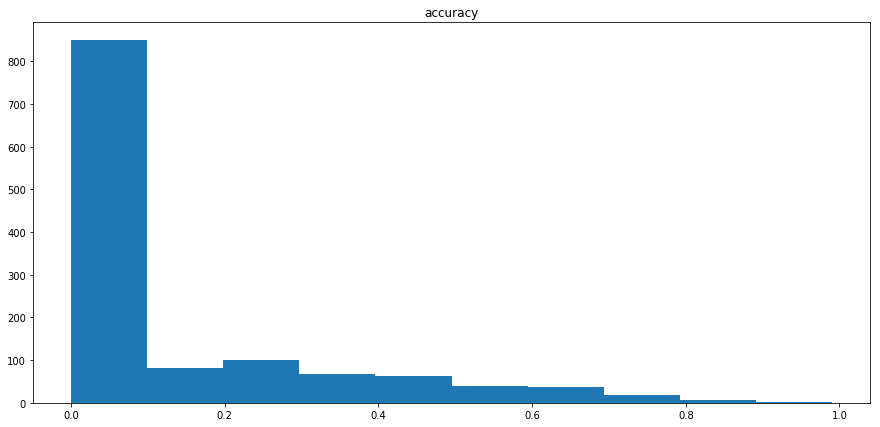

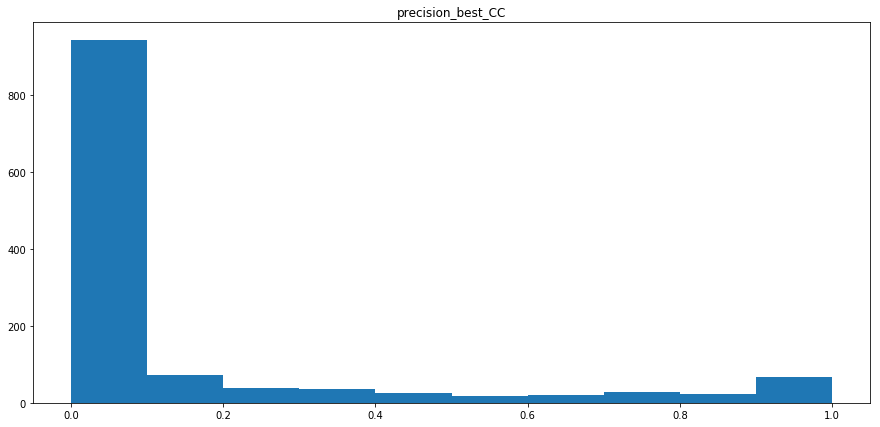

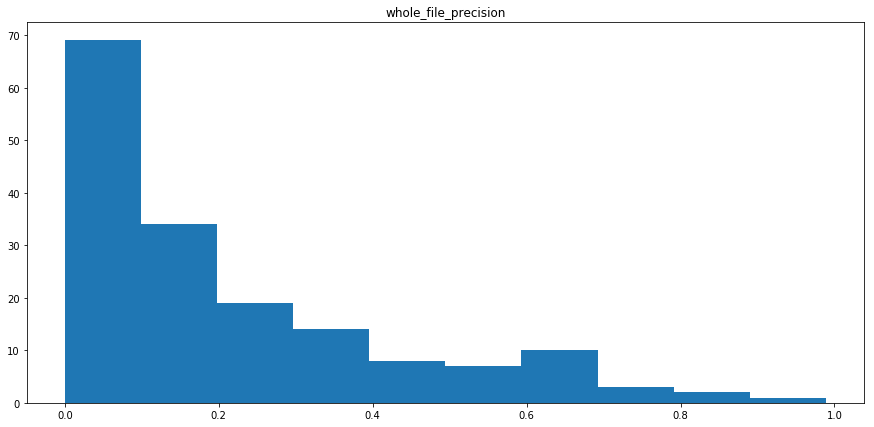

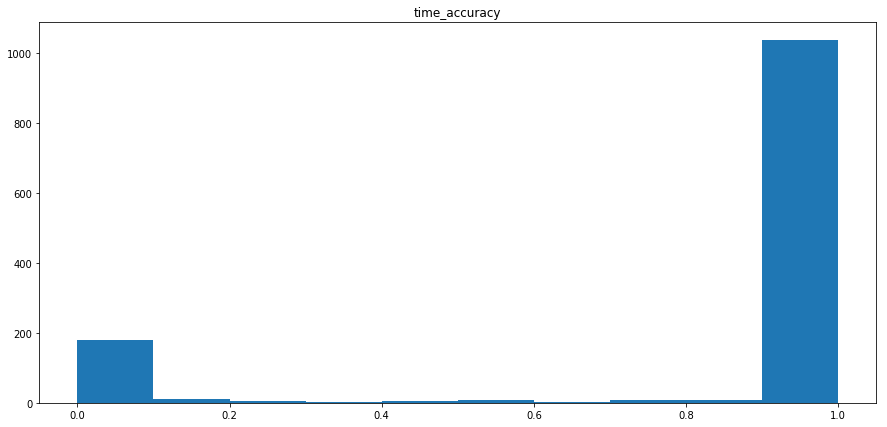

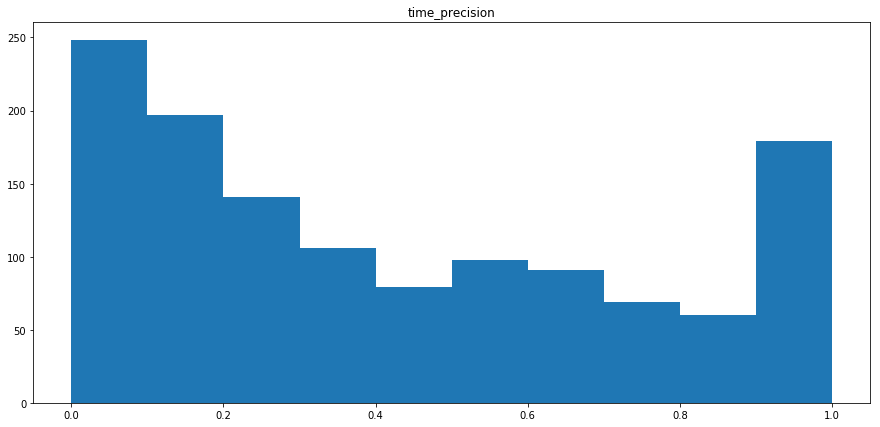

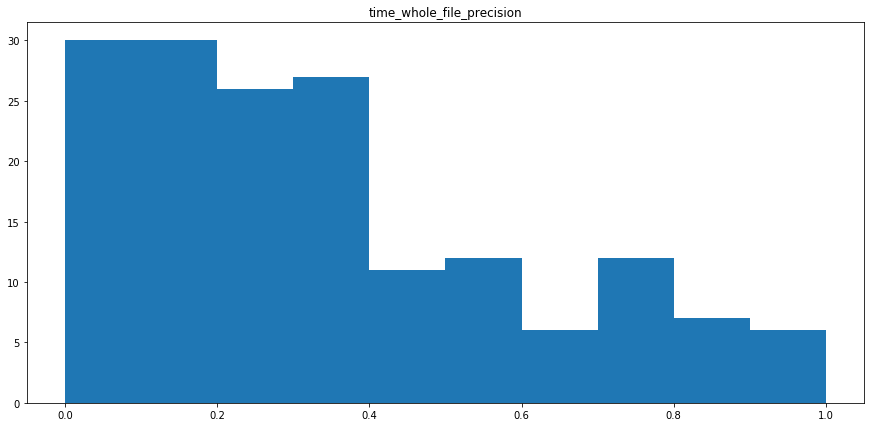

In [37]:
for key in result_dict.keys():
    plt.figure(figsize=[15,7])
    plt.hist(result_dict[key])
    plt.title(key)
    plt.show()

In [ ]:
## TODO: 1 - precision per CC, 2 - get the edge cases e.g without entropy or relaxed energy precentile threshold